In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [35]:
df_test = pd.read_csv("df-test_set.csv")
df_train = pd.read_csv("df - train_set.csv")

In [36]:
df_train.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
0,CAPE,EC120,1L,12.0,APPLE GRANNY SMITH,2020-03-10,108.0,112.0,3236.0,29,348.0,0,9.30
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
2,GAUTENG,AT200,1L,20.0,AVOCADO PINKERTON,2020-05-05,70.0,80.0,4860.0,66,1320.0,50,3.68
3,TRANSVAAL,BJ090,1L,9.0,TOMATOES-LONG LIFE,2020-01-20,60.0,60.0,600.0,10,90.0,0,6.67
4,WESTERN FREESTATE,PP100,1R,10.0,POTATO SIFRA (WASHED),2020-07-14,40.0,45.0,41530.0,927,9270.0,393,4.48


In [37]:
#Our investigation  focuses on Golden delicios Apple so we have to extract data that is relevent
df = df_train[df_train['Commodities'] == 'APPLE GOLDEN DELICIOUS']
df.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11
40,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51
69,EASTERN CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50


In [70]:
df_test.head(2)

,Index,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Province_CAPE,Province_EASTERN CAPE,...,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X,Season_Autumn,Season_Spring,Season_Summer,Season_Winter
0,1,12.0,128.0,136.0,5008.0,38,456.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2,18.3,220.0,220.0,1760.0,8,146.4,2,0,0,...,1,0,0,0,0,0,1,0,0,0


In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight_Kg,1952.0,40.460912,99.655169,3.00,9.00,12.00,18.300,400.00
Low_Price,1952.0,174.307377,373.553578,2.00,50.00,80.00,127.250,2300.00
High_Price,1952.0,215.648053,433.546159,5.00,60.00,108.00,160.000,3300.00
Sales_Total,1952.0,20053.533811,39005.069445,5.00,1325.00,5495.00,21082.500,369464.00
Total_Qty_Sold,1952.0,174.510758,308.810797,1.00,12.00,64.00,200.000,4237.00
Total_Kg_Sold,1952.0,2960.176332,6097.416527,3.00,219.60,853.50,3093.525,74000.00
Stock_On_Hand,1952.0,408.393955,724.450582,0.00,9.00,126.50,468.000,6400.00
avg_price_per_kg,1952.0,6.778893,2.248744,0.25,5.46,6.67,8.280,21.24


In [40]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Index,685.0,343.000000,197.886752,1.0,172.0,343.0,514.0,685.0
Weight_Kg,685.0,34.142482,87.575995,3.0,9.0,12.0,18.3,400.0
Low_Price,685.0,164.202891,355.167319,10.0,50.0,80.0,128.0,2400.0
High_Price,685.0,195.590073,389.109476,10.0,64.0,112.0,160.0,2400.0
Sales_Total,685.0,18788.111212,33951.586813,10.0,1300.0,5520.0,21176.0,308010.0
Total_Qty_Sold,685.0,174.883212,299.351142,1.0,13.0,62.0,200.0,2774.0
Total_Kg_Sold,685.0,2725.402336,5059.123311,6.3,204.0,860.1,3033.0,47200.0
Stock_On_Hand,685.0,439.245255,715.985761,0.0,20.0,153.0,516.0,6827.0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 1 to 64310
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province          1952 non-null   object 
 1   Container         1952 non-null   object 
 2   Size_Grade        1952 non-null   object 
 3   Weight_Kg         1952 non-null   float64
 4   Commodities       1952 non-null   object 
 5   Date              1952 non-null   object 
 6   Low_Price         1952 non-null   float64
 7   High_Price        1952 non-null   float64
 8   Sales_Total       1952 non-null   float64
 9   Total_Qty_Sold    1952 non-null   int64  
 10  Total_Kg_Sold     1952 non-null   float64
 11  Stock_On_Hand     1952 non-null   int64  
 12  avg_price_per_kg  1952 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 213.5+ KB


In [42]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685 entries, 0 to 684
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           685 non-null    int64  
 1   Province        685 non-null    object 
 2   Container       685 non-null    object 
 3   Size_Grade      685 non-null    object 
 4   Weight_Kg       685 non-null    float64
 5   Commodities     685 non-null    object 
 6   Date            685 non-null    object 
 7   Low_Price       685 non-null    float64
 8   High_Price      685 non-null    float64
 9   Sales_Total     685 non-null    float64
 10  Total_Qty_Sold  685 non-null    int64  
 11  Total_Kg_Sold   685 non-null    float64
 12  Stock_On_Hand   685 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 69.7+ KB


In [43]:
#Now we can drop commodities and Index column
df = df.drop(['Commodities'], axis=1)
df_test = df_test.drop(['Commodities'], axis=1)

In [44]:
#We need to convert date into seasons
#We create a function that is going to do that for us
def season(x, date_format):
    date_str = [str(i) for i in x]
    months = [datetime.strptime(i, date_format).month for i in date_str]
    
    dict_ = {1: 'Summer',
             2: 'Summer',
             3: 'Autumn',
             4: 'Autumn',
             5: 'Autumn',
             6: 'Winter',
             7: 'Winter',
             8: 'Winter',
             9: 'Spring',
             10: 'Spring',
             11: 'Spring',
             12: 'Summer'}
    
    seasons = [dict_[month] for month in months] 
    
    return seasons

In [50]:
df["Season"] = pd.DataFrame(season(df.Date, '%Y-%m-%d'))
df_test['Season'] = pd.DataFrame(season(df.Date, "%Y-%m-%d"))

In [51]:
#Let us see if our function was applied as we expected
df.head(2)

,Province,Container,Size_Grade,Weight_Kg,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Season
1,CAPE,M4183,1L,18.3,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51,Autumn
7,CAPE,JG110,2M,11.0,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55,Winter


In [52]:
df_test.head(2)

,Index,Province,Container,Size_Grade,Weight_Kg,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Season
0,1,W.CAPE-BERGRIVER ETC,EC120,1M,12.0,2020-07-09,128.0,136.0,5008.0,38,456.0,0,Spring
1,2,W.CAPE-BERGRIVER ETC,M4183,1X,18.3,2020-01-20,220.0,220.0,1760.0,8,146.4,2,Autumn


In [53]:
#Now we can drop the Date column since we have converted it into seasons
df = df.drop(['Date'], axis=1)
df_test = df_test.drop(["Date"], axis=1)

In [72]:
df_test.shape

(685, 40)

In [71]:
df.shape


(1952, 40)

In [56]:
df.corr()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
Weight_Kg,1.000000,0.863182,0.905852,0.180518,-0.133317,0.294117,-0.144105,-0.337886
Low_Price,0.863182,1.000000,0.938140,0.183230,-0.122823,0.269744,-0.127677,-0.141740
High_Price,0.905852,0.938140,1.000000,0.265672,-0.096456,0.372282,-0.094174,-0.164496
Sales_Total,0.180518,0.183230,0.265672,1.000000,0.771865,0.962338,0.284693,0.108473
Total_Qty_Sold,-0.133317,-0.122823,-0.096456,0.771865,1.000000,0.651440,0.390168,0.087536
Total_Kg_Sold,0.294117,0.269744,0.372282,0.962338,0.651440,1.000000,0.229062,-0.001007
Stock_On_Hand,-0.144105,-0.127677,-0.094174,0.284693,0.390168,0.229062,1.000000,0.105028
avg_price_per_kg,-0.337886,-0.141740,-0.164496,0.108473,0.087536,-0.001007,0.105028,1.000000


<AxesSubplot:>

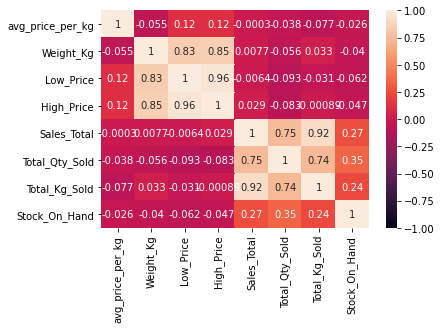

In [58]:
sns.heatmap(df_train[['avg_price_per_kg', 'Weight_Kg', 'Low_Price', 'High_Price', 'Sales_Total', 'Total_Qty_Sold', 'Total_Kg_Sold', 'Stock_On_Hand']].corr(), vmin = -1, vmax = 1, annot = True)

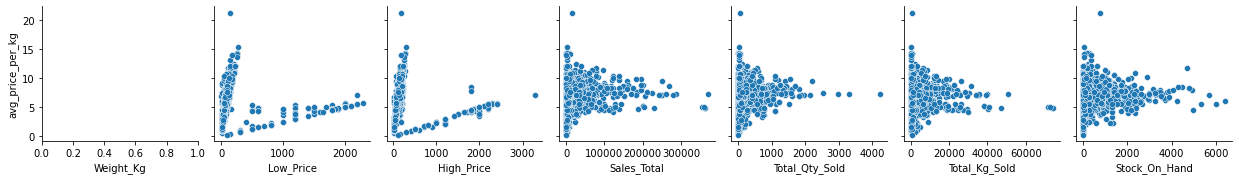

In [59]:
sns.pairplot(
    df,
    x_vars = ['Weight_Kg', 'Low_Price', 'High_Price', 'Sales_Total', 'Total_Qty_Sold', 'Total_Kg_Sold', 'Stock_On_Hand'],
    y_vars = ['avg_price_per_kg'])

C:\Users\Tholokuhle Ntombela\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Tholokuhle Ntombela\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Tholokuhle Ntombela\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

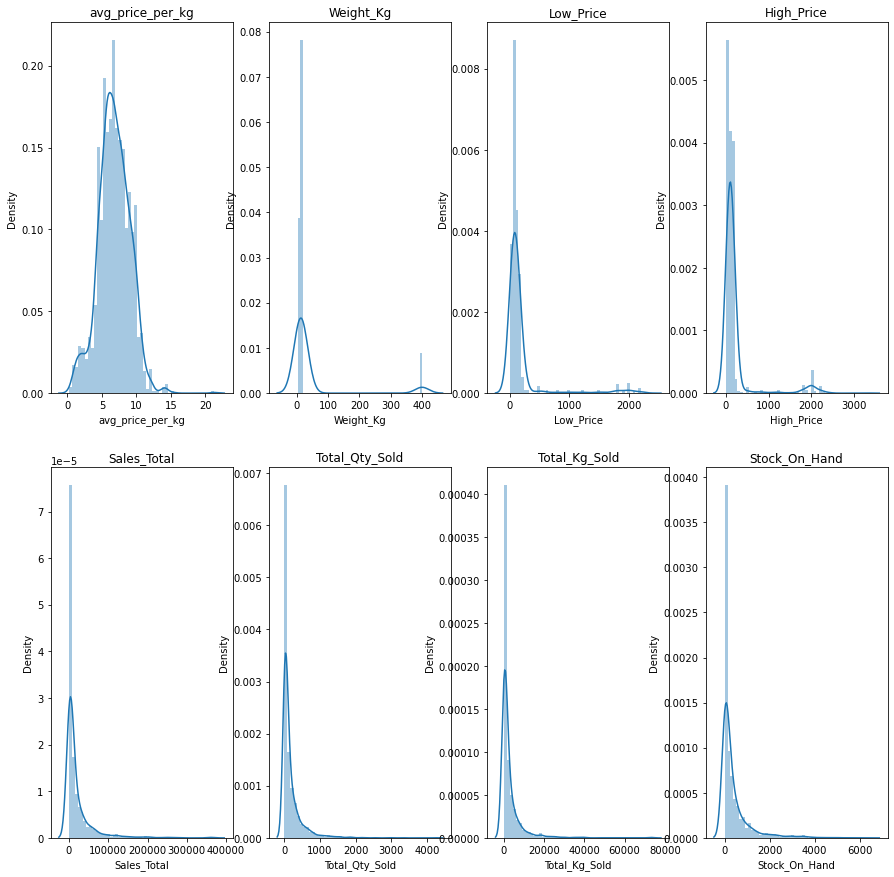

In [60]:
#Let us look at the distribution of each varaible
cols = ['avg_price_per_kg', 'Weight_Kg', 'Low_Price', 'High_Price', 'Sales_Total', 'Total_Qty_Sold', 'Total_Kg_Sold', 'Stock_On_Hand']
fig, axes = plt.subplots(nrows = 2, ncols = 4)    # axes is 2d array (3x3)
axes = axes.flatten()         # Convert axes to 1d array of length 9
fig.set_size_inches(15, 15)

for ax, col in zip(axes, cols):
  sns.distplot(df[col], ax = ax)
  ax.set_title(col)

In [61]:
#let us encode dummy varaible so that they can be numeric
df = pd.get_dummies(df)
df_test = pd.get_dummies(df_test)

In [64]:
#Let us separate response varaible from predictor varaible
Y_df = df['avg_price_per_kg']
X_df = df.drop(['avg_price_per_kg'], axis=1)

In [65]:
#Let us now try to fit a model but we have to import neccessary tools to do that
from sklearn.tree import DecisionTreeRegressor

In [66]:
regr_tree = DecisionTreeRegressor(random_state=42)

In [67]:
regr_tree.fit(X_df,Y_df)

DecisionTreeRegressor(random_state=42)

In [68]:
#Now let us evaluate our model perfomance
from sklearn.metrics import mean_squared_error

In [69]:
# get predictions for test data
y_pred = regr_tree.predict(df_test)

ValueError: Number of features of the model must match the input. Model n_features is 39 and input n_features is 40 